Andry Rakotonjanabelo
 - Jackson
 - Salmin
 - Linh Vu

DS325, Gettysburg College, Professor Eatai Roth
# Problem Set 1 - Linear Regression

Due Friday Feb 13, 2025 11:30a

Total pts: 20

## IMPORTANT INSTRUCTIONS:

 - When you submit your code, make sure that every cell runs without returning an error.
 - Once you have the results you need, edit out any extraneous code and outputs.
 - Do not rewrite code if it doesn't need to be rewritten. For example, all the import statements you should need are in the first code block. Do not redo those in your analysis.

## Problem 1

 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

In [59]:
import pandas as pd
import numpy as np
import sklearn as sk

from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns


In [60]:
def print_model(bias, Theta, X_names, model_name = None):
    # A function to print the equation of a linear model
    if model_name is None:
        model_str = f'y ='
    else:
        model_str = f'{model_name}:\n y ='

    if not bias==0:
        model_str += f' {bias:.2f}'
        
    for theta, x in zip(Theta, X_names):
        if theta==0:
            continue
        else:
            model_str+= f' + {theta:.2f}*{x}'
    print(model_str)

In [61]:
np.random.seed(1)
bias = 20*np.random.randn()

X, y, coef = make_regression(n_samples=300, 
                                   n_features=5,    # n_features = 5 --> simple linear regression
                                   noise=30, 
                                   bias = bias, 
                                   random_state=1, 
                                   shuffle = False, # samples will be in order
                                   coef = True) 

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg_df = pd.DataFrame(data = X, 
             columns = column_names)
reg_df['y'] = y

reg_df

,x1,x2,x3,x4,x5,y
0,1.624345,-0.611756,-0.528172,-1.072969,0.865408,28.865495
1,-2.301539,1.744812,-0.761207,0.319039,-0.249370,4.937580
2,1.462108,-2.060141,-0.322417,-0.384054,1.133769,-39.935140
3,-1.099891,-0.172428,-0.877858,0.042214,0.582815,-49.524568
4,-1.100619,1.144724,0.901591,0.502494,0.900856,244.382026
...,...,...,...,...,...,...
295,-0.081570,1.529248,0.686483,1.717089,-0.804277,343.244347
296,0.300254,-0.429596,0.805913,-0.219552,-0.251852,20.913333
297,-1.326490,0.308204,1.115489,1.008196,-3.016032,-8.753043
298,-1.619646,2.005141,-0.187626,-0.148941,1.165335,182.614426


In [62]:
#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

#create and fit linear model
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

#predict on train and test set
y_pred_train = model_1.predict(X_train)
y_pred_test = model_1.predict(X_test)

R2_train = model_1.score(X_train, y_train)
R2_test = model_1.score(X_test, y_test)

#calculate MSE
MSE_train = mean_squared_error(y_train, y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test)

#print(model_1.__dict__)
print(f'R2_train: {R2_train:.2f}')
print(f'R2_test: {R2_test:.2f}')
print(f'MSE_train: {MSE_train:.2f}')
print(f'MSE_test: {MSE_test:.2f}')
print_model(model_1.intercept_, model_1.coef_, column_names, 'model_1')

R2_train: 0.96
R2_test: 0.97
MSE_train: 945.28
MSE_test: 845.66
model_1:
 y = 34.54 + 43.02*x1 + 78.19*x2 + 90.23*x3 + 86.00*x4 + 67.15*x5


In [63]:
print(coef)

[42.54034656 81.07212336 94.18862462 86.99107733 70.39994983]


#### Your written answers here

What are your model parameters?
 - 

What were your MSE and R^2?
 - 



The model parameters are $34.54 + 43.02*x_1 + 78.19*x_2 + 90.23*x_3 + 86.00*x_4 + 67.15*x_5$

The $MSE$ for the training and test sets are $945.28$ and $845.66$, respectively. The $R^2$ for the training and sets are $0.96$ and $0.97$, respectively.

## Problem 2

Multiple Regression with Synthetic Data and Co-linearity

 - Show the correlation matrix for the 10 variables and the target variable.
 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

In [64]:
np.random.seed(15)
bias = 50*np.random.randn()

X, y, coef = sk.datasets.make_regression(n_samples=300, 
                                   n_features=9,    # n_features = 10 --> multiple linear regression
                                   noise=3, 
                                   bias = bias, 
                                   n_informative = 6,
                                   effective_rank = 6,
                                   random_state=15, 
                                   shuffle = False, # samples will be in order
                                   coef = True)

Xa = (0.6*X[:, 2] + 0.4*X[:, 5]).reshape(-1, 1)
X = np.hstack([X, Xa])
coef = np.append(coef, 0)

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg2_df = pd.DataFrame(data = X, 
             columns = column_names)
reg2_df['y'] = y

print_model(bias, coef, column_names, model_name = 'True Model')

True Model:
 y = -15.62 + 55.43*x1 + 77.93*x2 + 94.15*x3 + 16.29*x4 + 57.11*x5 + 79.90*x6


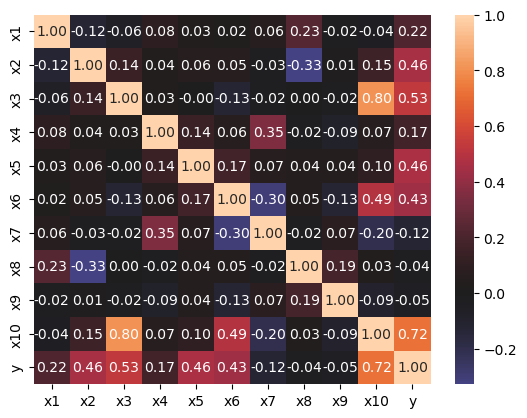

In [65]:
corr = reg2_df.corr() #calculate correlation of dataframe/matrix
sns.heatmap(corr, annot=True, center=0, fmt='.2f') #plot heatmap
plt.show()

In [66]:
#candidate_idx = [0, 1, 2, 3, 4, 5,9]
#candidate_idx = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
candidate_idx = [0, 1, 3, 4, 9]
Z= X[:,candidate_idx] #select columns from x
Z_names = [column_names[i] for i in candidate_idx] #select column names

Z_train, Z_test, y_train, y_test = train_test_split(Z, y, test_size=0.2)

model_LR = LinearRegression()
model_LR.fit(Z_train, y_train)

R2_train = model_LR.score(Z_train, y_train)
R2_test = model_LR.score(Z_test, y_test)

MSE_test = mean_squared_error(y_test, model_LR.predict(Z_test))
MSE_train = mean_squared_error(y_train, model_LR.predict(Z_train))

In [68]:
print(f'R2_train: {R2_train:.2f}')
print(f'R2_test: {R2_test:.2f}')
print(f'MSE_train: {mean_squared_error(y_train, y_pred_train):.2f}')
print(f'MSE_test: {mean_squared_error(y_test, y_pred_test):.2f}')

print_model(bias, coef, column_names, model_name = 'True Model')
print_model(model_LR.intercept_, model_LR.coef_, Z_names, model_name = 'Fit Model')

R2_train: 0.86
R2_test: 0.89
MSE_train: 30364.88
MSE_test: 35099.84
True Model:
 y = -15.62 + 55.43*x1 + 77.93*x2 + 94.15*x3 + 16.29*x4 + 57.11*x5 + 79.90*x6
Fit Model:
 y = -15.37 + 59.04*x1 + 76.39*x2 + 9.96*x4 + 57.26*x5 + 179.47*x10


#### Your written answers here

What are your model parameters?
 - 

Which features (x1, x2...) were significant? Which were co-linear?
 - 
 
What were your MSE and R^2?
 - 



The model parameters are $-15.37 + 59.04*x_1 + 76.39*x_2 + 9.96*x_4 + 57.26*x_5 + 179.47*x_{10}$.

The features that were most significant are $x_2, x_3, x_5, x_6$ and $x_{10}$. Feature $x_3$ is co-linear with $x_{10}$ with $r=.8$.

The $MSE$ for the training and test sets are $30364.88$ and $35099.84$, respectively. The $R^2$ for the training and sets are $0.86$ and $0.89$, respectively.

## Problem 3

For this problem, you'll using housing data from King County, Washington (included as kc_housing.csv).

You should refer to the class notebook.

In [15]:
housing_df = pd.read_csv('kc_house_data.csv')
housing_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### a. 

**Do this part before part b and then don't go back and change your responses.**

- Select three features to use for a multiple linear regression and justify your choices.
- Use the StandardScalar to scale your features. Fit a linear regression using those three features. What is your $R^2$?
- Plot predicted home values and actual home values, including a line representing perfect prediction.


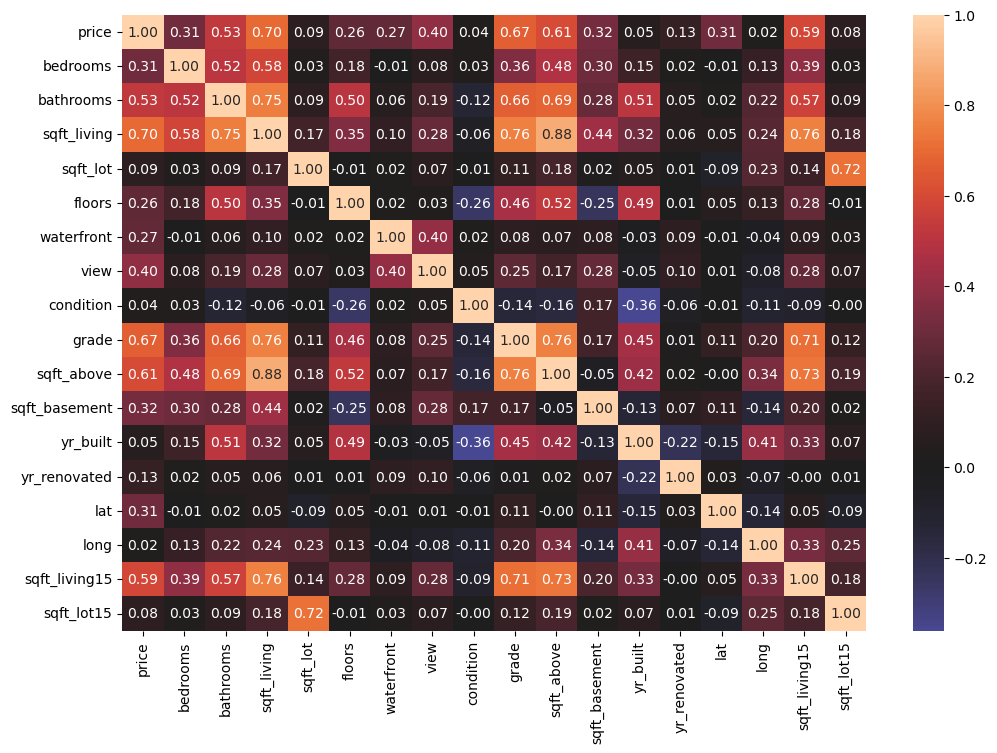

In [16]:
#drop columns id,date and zipcode
housing_df = housing_df.drop(columns=['id', 'date', 'zipcode'])
housing_corr = housing_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(housing_corr, annot=True, center=0, fmt='.2f') #plot heatmap
plt.show()

#### Your written answers here
Which features are you using and why?
 
We will use sqrt_foot living, bedrooms, and view as they are the feature that have a relativelyl high correlation with the target (price) while not being highly correlated with each other.

In [69]:
from sklearn.preprocessing import StandardScaler

#fit linear regression using sqft_living, bathroom, and grades to predict price
X = housing_df[['sqft_living', 'bedrooms', 'view']]
y = housing_df['price']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale the features
scaler = StandardScaler()
X_scaled = scaler.fit(X_train)
X_train_ss = X_scaled.transform(X_train)
X_test_ss = X_scaled.transform(X_test)

# create and fit the linear regression model
model = LinearRegression()
model.fit(X_train_ss, y_train)

# predict on train and test set
y_pred_train = model.predict(X_train_ss)
y_pred_test = model.predict(X_test_ss)

# calculate R^2
R2_train = model.score(X_train_ss, y_train)
R2_test = model.score(X_test_ss, y_test)

print(f'R^2 on training set: {R2_train}')
print(f'R^2 on test set: {R2_test}')

R^2 on training set: 0.5439318581935142
R^2 on test set: 0.5464195943443431


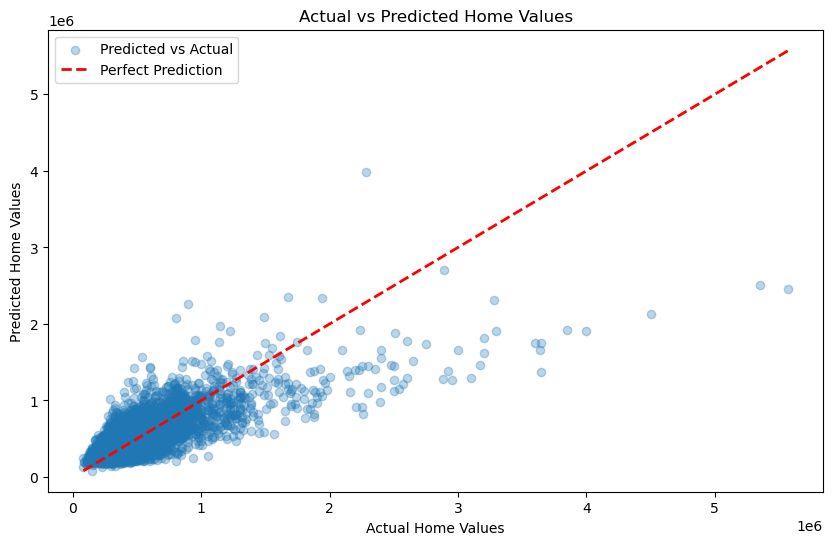

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.3, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Home Values')
plt.ylabel('Predicted Home Values')
plt.title('Actual vs Predicted Home Values')
plt.legend()
plt.show()

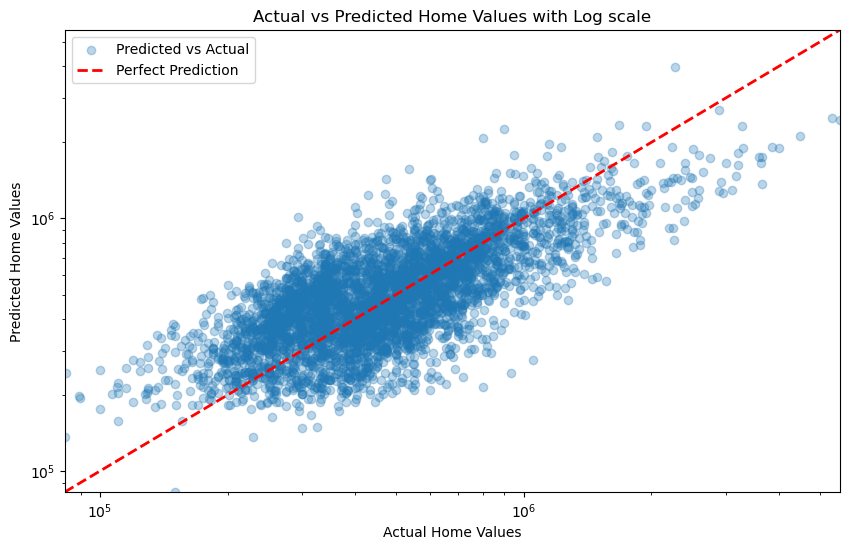

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.3, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Home Values')
plt.ylabel('Predicted Home Values')
plt.title('Actual vs Predicted Home Values with Log scale')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlim([y_test.min(), y_test.max()])
plt.ylim([y_test.min(), y_test.max()])
plt.show()

### b. 
- Create a training and testing data using all the features except for price (that's the target), date, and zipcode. Once you have the dataframe of your features, save a list of column labels, ```feature_names = x.columns```.
- Use Lasso or Ridge regression to fit the model and calculate the $R^2$. Play around with $\alpha$ until you get $R^2 > 0.65$. Keep in mind that price is in the range of \$100k-3M and the scaled features will be in the range of -2 to 2, so $\alpha$ should be a big number.
- Get the coefficients of the Ridge or Lasso model; their order corresponds to the feature labels you saved earlier. Find the 3 biggest (absolute value) coefficients. Which features are they? Look up ```np.argsort()```; this function returns the indices of a list once it's been sorted. 
- Plot predicted vs actual home prices for the regularized model. 

In [ ]:
# Your code here. Add cells as needed.
y = housing_df['price']
X = housing_df.drop(columns=['price'])

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

column_names = X.columns

model_lasso = sk.linear_model.Lasso(alpha=1)
model_lasso.fit(X_train, y_train)

# predict on train and test set
y_pred_train = model_lasso.predict(X_train)
y_pred_test = model_lasso.predict(X_test)

# calculate R^2
R2_train = model_lasso.score(X_train, y_train)
R2_test = model_lasso.score(X_test, y_test)

print(f'R^2 on training set: {R2_train}')
print(f'R^2 on test set: {R2_test}')

R^2 on training set: 0.6951038925326433
R^2 on test set: 0.6957271251493146


c:\Users\Andry Arthur\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.124e+14, tolerance: 2.259e+11
  model = cd_fast.enet_coordinate_descent(


### Using different $\alpha$ for Lasso Regression:

In [75]:
#try different values of alpha
alpha_values = [0.1, 1, 10, 100, 1000, 10000, 100000]

for alpha in alpha_values:
    model_lasso = sk.linear_model.Lasso(alpha=alpha)
    model_lasso.fit(X_train, y_train)

    # predict on train and test set
    y_pred_train = model_lasso.predict(X_train)
    y_pred_test = model_lasso.predict(X_test)

    # calculate R^2
    R2_train = model_lasso.score(X_train, y_train)
    R2_test = model_lasso.score(X_test, y_test)

    print(f'alpha={alpha} R^2 on training set: {R2_train}')
    print(f'alpha={alpha} R^2 on test set: {R2_test}')



c:\Users\Andry Arthur\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.124e+14, tolerance: 2.259e+11
  model = cd_fast.enet_coordinate_descent(


alpha=0.1 R^2 on training set: 0.6951038946655181
alpha=0.1 R^2 on test set: 0.6957295660258316


c:\Users\Andry Arthur\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.124e+14, tolerance: 2.259e+11
  model = cd_fast.enet_coordinate_descent(


alpha=1 R^2 on training set: 0.6951038925326433
alpha=1 R^2 on test set: 0.6957271251493146


c:\Users\Andry Arthur\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.127e+14, tolerance: 2.259e+11
  model = cd_fast.enet_coordinate_descent(


alpha=10 R^2 on training set: 0.69510367924516
alpha=10 R^2 on test set: 0.6957025260700638


c:\Users\Andry Arthur\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.148e+14, tolerance: 2.259e+11
  model = cd_fast.enet_coordinate_descent(


alpha=100 R^2 on training set: 0.6950823504968182
alpha=100 R^2 on test set: 0.6954375038691682


c:\Users\Andry Arthur\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.344e+14, tolerance: 2.259e+11
  model = cd_fast.enet_coordinate_descent(


alpha=1000 R^2 on training set: 0.6929494756626311
alpha=1000 R^2 on test set: 0.6908841410218334
alpha=10000 R^2 on training set: 0.6297927828427708
alpha=10000 R^2 on test set: 0.6254570012487108
alpha=100000 R^2 on training set: 0.5418447142193799
alpha=100000 R^2 on test set: 0.5409817940679156


c:\Users\Andry Arthur\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.137e+14, tolerance: 2.259e+11
  model = cd_fast.enet_coordinate_descent(


In [80]:
#final model with alpha=4500
model_lasso = sk.linear_model.Lasso(alpha=4500)
model_lasso.fit(X_train, y_train)

# predict on train and test set
y_pred_train = model_lasso.predict(X_train)
y_pred_test = model_lasso.predict(X_test)

# calculate R^2
R2_train = model_lasso.score(X_train, y_train)
R2_test = model_lasso.score(X_test, y_test)

MSE_train = mean_squared_error(y_train, y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test)

print(f'R^2 on training set: {R2_train}')
print(f'R^2 on test set: {R2_test}')
print(f'MSE on training set: {MSE_train}')
print(f'MSE on test set: {MSE_test}')
print_model(model_lasso.intercept_, model_lasso.coef_, column_names, 'Lasso Model')

#argsort on the absolute value of the coefficients
idx = np.argsort(np.abs(model_lasso.coef_))[::-1]
print(f'Top 3 features selected by Lasso: {column_names[idx[:3]]}')

R^2 on training set: 0.6686865348854187
R^2 on test set: 0.6615128772117009
MSE on training set: 43285644934.7075
MSE on test set: 51171370364.41798
Lasso Model:
 y = -9268277.21 + -29064.89*bedrooms + 28907.72*bathrooms + 276.74*sqft_living + -0.01*sqft_lot + 66897.64*view + 10162.12*condition + 100764.66*grade + -90.49*sqft_above + -109.79*sqft_basement + -2936.63*yr_built + 25.33*yr_renovated + 302613.88*lat + 20.26*sqft_living15 + -0.43*sqft_lot15
Top 3 features selected by Lasso: Index(['lat', 'grade', 'view'], dtype='object')


c:\Users\Andry Arthur\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.828e+14, tolerance: 2.259e+11
  model = cd_fast.enet_coordinate_descent(


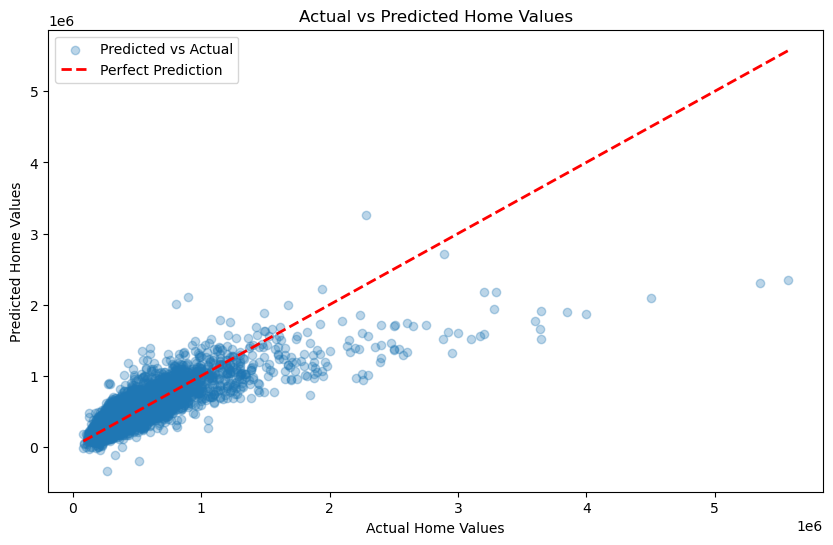

In [81]:
#plot predicted vs actual home values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.3, label='Predicted vs Actual') 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Home Values')
plt.ylabel('Predicted Home Values')
plt.title('Actual vs Predicted Home Values')
plt.legend()
plt.show()

### Your written answers here
Which regression did you use?
 - I used Lasso regression.

Does your regularized model look better than your MLR? How so?
 - Your answer

### c.
It seems that our model over-valuates houses in the higher price range.
 - Split the data into homes below and above $1M sale price. 
 - Fit a Lasso or Ridge model to each of the split data sets.
 - Plot predicted vs actual.

<Your written answers>

c:\Users\Andry Arthur\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.280e+14, tolerance: 6.248e+10
  model = cd_fast.enet_coordinate_descent(


R^2 on training set for homes below $1M: 0.6484551761921147
R^2 on test set for homes below $1M: 0.6630594323706109
MSE on training set for homes below $1M: 13627540496.749943
MSE on test set for homes below $1M: 12704142726.988495
Lasso Model for homes below $1M:
 y = -10346058.29 + 6185.88*bathrooms + 119.54*sqft_living + 0.19*sqft_lot + 19362.43*floors + 14883.10*view + 7894.77*condition + 70861.06*grade + -48.10*sqft_above + -41.55*sqft_basement + -1858.03*yr_built + 11.86*yr_renovated + 286482.64*lat + 56.19*sqft_living15 + -0.21*sqft_lot15


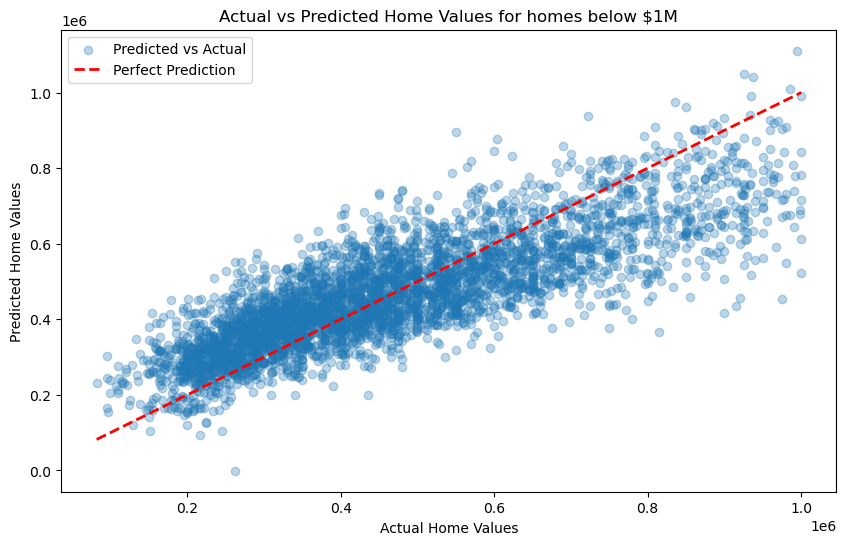

In [82]:
#split data into homes below and above $1M sale price
below_1M = housing_df[housing_df['price'] <= 1_000_000]
above_1M = housing_df[housing_df['price'] > 1_000_000]

#fit linear regression for homes below $1M on all features except price
X = below_1M.drop(columns=['price'])
y = below_1M['price']

X_train_below, X_test_below, y_train_below, y_test_below = train_test_split(X, y, test_size=0.2, random_state=42)

model_below = sk.linear_model.Lasso(alpha=4500)
model_below.fit(X_train_below, y_train_below)

# predict on train and test set
y_pred_train_below = model_below.predict(X_train_below)
y_pred_test_below = model_below.predict(X_test_below)

# calculate R^2
R2_train_below = model_below.score(X_train_below, y_train_below)
R2_test_below = model_below.score(X_test_below, y_test_below)

MSE_train_below = mean_squared_error(y_train_below, y_pred_train_below)
MSE_test_below = mean_squared_error(y_test_below, y_pred_test_below)

print(f'R^2 on training set for homes below $1M: {R2_train_below}')
print(f'R^2 on test set for homes below $1M: {R2_test_below}')
print(f'MSE on training set for homes below $1M: {MSE_train_below}')
print(f'MSE on test set for homes below $1M: {MSE_test_below}')
print_model(model_below.intercept_, model_below.coef_, column_names, 'Lasso Model for homes below $1M')

#plot predicted vs actual home values for homes below $1M
plt.figure(figsize=(10, 6))
plt.scatter(y_test_below, y_pred_test_below, alpha=0.3, label='Predicted vs Actual')
plt.plot([y_test_below.min(), y_test_below.max()], [y_test_below.min(), y_test_below.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Home Values')
plt.ylabel('Predicted Home Values')
plt.title('Actual vs Predicted Home Values for homes below $1M')
plt.legend()
plt.show()


c:\Users\Andry Arthur\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.044e+14, tolerance: 4.826e+10
  model = cd_fast.enet_coordinate_descent(


R^2 on training set for homes above $1M: 0.5156574446032125
R^2 on test set for homes above $1M: 0.4084832709347578
MSE on training set for homes above $1M: 199459007793.46497
MSE on test set for homes above $1M: 193582903548.3216
Lasso Model for homes above $1M:
 y = -91349878.21 + -18307.05*bedrooms + 52064.66*bathrooms + 344.44*sqft_living + -0.23*sqft_lot + -108059.44*floors + 585437.27*waterfront + 15669.20*view + 13181.28*condition + 63987.68*grade + 7.15*sqft_above + -105.44*sqft_basement + -3123.28*yr_built + 36.26*yr_renovated + -795184.40*long + 5.30*sqft_living15 + -2.48*sqft_lot15


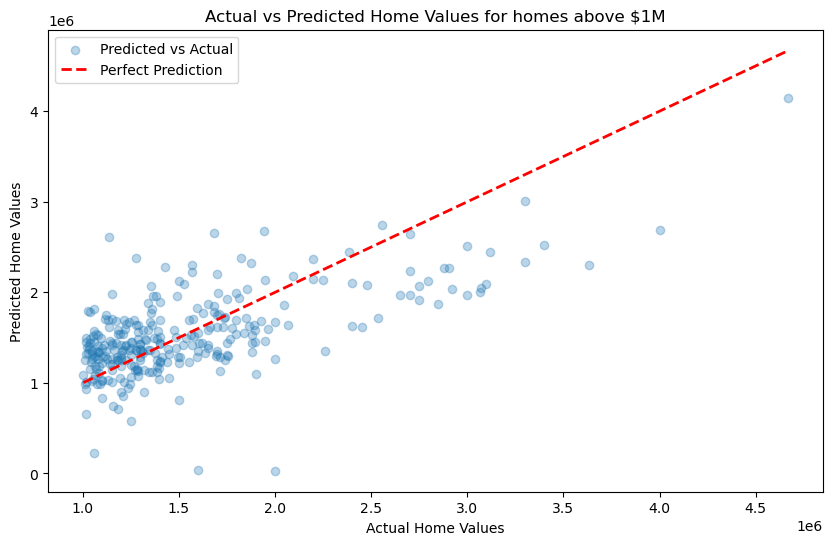

In [83]:
#fit linear regression for homes above $1M on all features except price
X = above_1M.drop(columns=['price'])
y = above_1M['price']

X_train_above, X_test_above, y_train_above, y_test_above = train_test_split(X, y, test_size=0.2, random_state=42)

model_above = sk.linear_model.Lasso(alpha=4500)
model_above.fit(X_train_above, y_train_above)

# predict on train and test set
y_pred_train_above = model_above.predict(X_train_above)
y_pred_test_above = model_above.predict(X_test_above)

# calculate R^2
R2_train_above = model_above.score(X_train_above, y_train_above)
R2_test_above = model_above.score(X_test_above, y_test_above)

MSE_train_above = mean_squared_error(y_train_above, y_pred_train_above)
MSE_test_above = mean_squared_error(y_test_above, y_pred_test_above)

print(f'R^2 on training set for homes above $1M: {R2_train_above}')
print(f'R^2 on test set for homes above $1M: {R2_test_above}')
print(f'MSE on training set for homes above $1M: {MSE_train_above}')
print(f'MSE on test set for homes above $1M: {MSE_test_above}')
print_model(model_above.intercept_, model_above.coef_, column_names, 'Lasso Model for homes above $1M')

#plot predicted vs actual home values for homes above $1M
plt.figure(figsize=(10, 6))
plt.scatter(y_test_above, y_pred_test_above, alpha=0.3, label='Predicted vs Actual')
plt.plot([y_test_above.min(), y_test_above.max()], [y_test_above.min(), y_test_above.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Home Values')
plt.ylabel('Predicted Home Values')
plt.title('Actual vs Predicted Home Values for homes above $1M')
plt.legend()
plt.show()

 ### Your written answers here

 What are the $R^2$ for the two models?

  - The $R^2$ for the training and test sets of the lasso model for homes *below* $1M are $0.65$ and $0.66$ respectively. One the other hand, the $R^2$ for the training and test sets of the lasso model for homes *above* $1M are $0.52$ and $0.41$ respectively.
 
